In [5]:
#Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.utils import resample

In [6]:
!pip install datasist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 128.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [7]:
from datasist.structdata import detect_outliers

In [8]:
#Reading Files
df = pd.read_csv(r'/content/stroke_risk_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

In [9]:
df.shape

(70000, 18)

In [10]:
df.head(10)

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1
5,1,1,0,0,0,1,1,0,0,0,0,1,1,1,0,34,43.0,0
6,0,1,1,1,1,0,1,0,0,0,0,1,0,1,1,74,68.0,1
7,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,47,54.5,1
8,1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,20,31.0,0
9,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,79,60.5,1


In [11]:
df.columns

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')

In [12]:
df['Stroke Risk (%)'].describe()

,Stroke Risk (%)
count,70000.000000
mean,55.558771
std,14.300898
min,5.000000
25%,45.500000
50%,55.500000
75%,66.000000
max,100.000000


In [13]:
#Data Cleaning & Transformation
df.isnull().sum()

,0
Chest Pain,0
Shortness of Breath,0
Irregular Heartbeat,0
Fatigue & Weakness,0
Dizziness,0
Swelling (Edema),0
Pain in Neck/Jaw/Shoulder/Back,0
Excessive Sweating,0
Persistent Cough,0
Nausea/Vomiting,0


In [14]:
df.duplicated().sum()

np.int64(1021)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
for col in df.columns:
  print(f"unqine values in {col}:{df[col].unique()}")

unqine values in Chest Pain:[0 1]
unqine values in Shortness of Breath:[1 0]
unqine values in Irregular Heartbeat:[1 0]
unqine values in Fatigue & Weakness:[1 0]
unqine values in Dizziness:[0 1]
unqine values in Swelling (Edema):[0 1]
unqine values in Pain in Neck/Jaw/Shoulder/Back:[0 1]
unqine values in Excessive Sweating:[1 0]
unqine values in Persistent Cough:[1 0]
unqine values in Nausea/Vomiting:[1 0]
unqine values in High Blood Pressure:[0 1]
unqine values in Chest Discomfort (Activity):[1 0]
unqine values in Cold Hands/Feet:[1 0]
unqine values in Snoring/Sleep Apnea:[0 1]
unqine values in Anxiety/Feeling of Doom:[0 1]
unqine values in Age:[54 49 62 48 61 34 74 47 20 79 87 83 23 64 81 43 40 26 45 63 78 19 77 66
 41 76 27 29 31 50 86 38 69 89 67 24 56 35 55 25 46 82 36 32 84 51 60 37
 68 30 80 21 57 44 70 18 39 90 88 53 28 22 71 33 75 85 52 42 73 59 58 72
 65]
unqine values in Stroke Risk (%):[ 58.   40.5  52.   60.   56.5  43.   68.   54.5  31.   60.5  74.5  67.5
  47.5  63.   76

In [17]:
df.value_counts().reset_index()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary),count
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,31,81.5,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,8.5,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,73,32.5,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,78,35.0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,28,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68974,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,37,24.5,0,1
68975,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,85,48.5,0,1
68976,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,20,11.0,0,1
68977,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,56,29.0,0,1


In [18]:
df.shape

(68979, 18)

<Axes: >

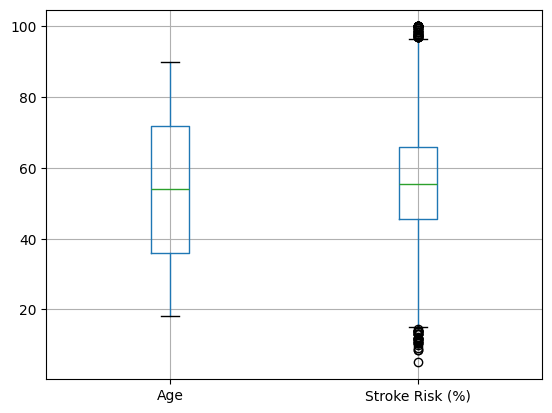

In [19]:
#Checking Outliers
df[['Age', 'Stroke Risk (%)']].describe()
df.boxplot(column=['Age', 'Stroke Risk (%)'])

In [20]:
df['Stroke Risk (%)']

,Stroke Risk (%)
0,58.0
1,40.5
2,52.0
3,60.0
4,56.5
...,...
69995,30.0
69996,33.0
69997,45.5
69998,48.5


In [21]:
#Multivariate anomaly detection

from sklearn.neighbors import LocalOutlierFactor

#Preparing the features
features = df[['Age', 'Stroke Risk (%)'] + [
    'Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
    'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
    'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
    'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
    'Chest Discomfort (Activity)', 'Cold Hands/Feet',
    'Snoring/Sleep Apnea', 'Anxiety/Feeling of Doom'
]]

#Applying LOF
lof = LocalOutlierFactor(n_neighbors=20)
df['LOF_outlier'] = lof.fit_predict(features)

#Filtering out the detected outliers
outliers = df[df['LOF_outlier'] == -1]
print(outliers)


       Chest Pain  Shortness of Breath  Irregular Heartbeat  \
16769           0                    0                    0   
23793           1                    1                    1   
39638           0                    0                    0   
46081           0                    0                    0   
55759           0                    0                    0   
64431           1                    0                    0   
65059           1                    1                    1   

       Fatigue & Weakness  Dizziness  Swelling (Edema)  \
16769                   1          0                 0   
23793                   1          1                 1   
39638                   0          0                 0   
46081                   0          0                 1   
55759                   0          0                 0   
64431                   0          0                 0   
65059                   1          1                 1   

       Pain in Neck/Jaw/Should

In [22]:
for feature in features.columns:
  print(df[feature].value_counts())

Age
37    1024
68    1012
83    1011
88    1001
54     999
      ... 
44     880
78     875
22     874
46     870
52     869
Name: count, Length: 73, dtype: int64
Stroke Risk (%)
56.0    978
55.5    924
50.5    917
56.5    914
55.0    902
       ... 
14.5      1
13.5      1
10.0      1
9.0       1
5.0       1
Name: count, Length: 183, dtype: int64
Chest Pain
1    34598
0    34381
Name: count, dtype: int64
Shortness of Breath
0    34716
1    34263
Name: count, dtype: int64
Irregular Heartbeat
0    34553
1    34426
Name: count, dtype: int64
Fatigue & Weakness
0    34513
1    34466
Name: count, dtype: int64
Dizziness
1    34703
0    34276
Name: count, dtype: int64
Swelling (Edema)
1    34537
0    34442
Name: count, dtype: int64
Pain in Neck/Jaw/Shoulder/Back
0    34558
1    34421
Name: count, dtype: int64
Excessive Sweating
1    34739
0    34240
Name: count, dtype: int64
Persistent Cough
1    34558
0    34421
Name: count, dtype: int64
Nausea/Vomiting
1    34604
0    34375
Name: count, dty

In [23]:
#Flagging outliers
df['is_outlier'] = df['LOF_outlier'].apply(lambda x: 1 if x == -1 else 0)


## EDA

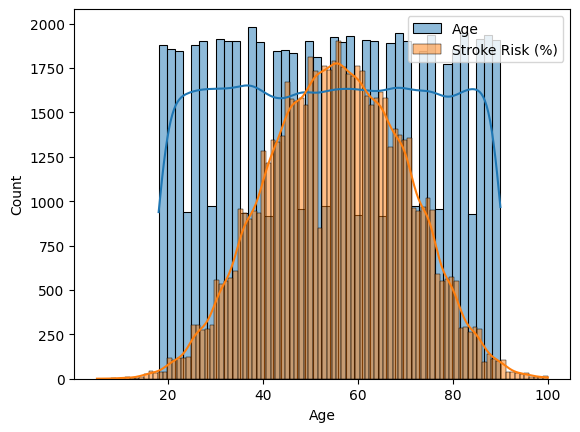

In [24]:
sns.histplot(df['Age'], kde=True, label='Age')
sns.histplot(df['Stroke Risk (%)'], kde=True, label='Stroke Risk (%)')
plt.legend()

## EDA

<Axes: xlabel='Age', ylabel='Stroke Risk (%)'>

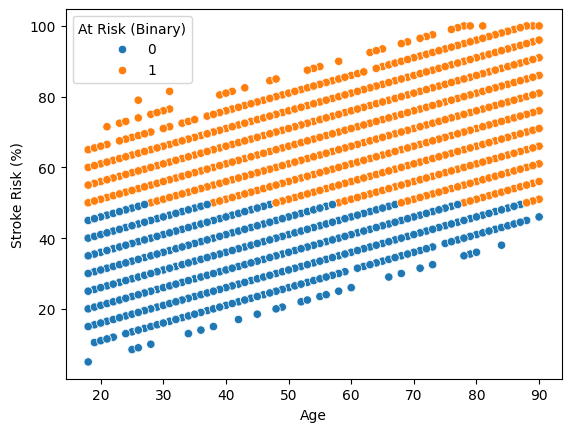

In [25]:
sns.scatterplot(x='Age', y='Stroke Risk (%)', hue='At Risk (Binary)', data=df)

- There is a positive linear trend between Age and Stroke Risk. As age increases, the stroke risk percentage tends to increase accordingly.

- The binary risk classification (At Risk) seems to use a stroke risk threshold for labeling. From the visual pattern, the cutoff appears to be around the 50% risk mark, where most individuals above this value are labeled as "At Risk" (1).

- Despite the overall trend, there are individuals at lower ages (e.g., 20s or 30s) who still fall into the "At Risk" category, indicating that factors beyond age (such as symptoms) contribute to elevated stroke risk.

- Age is a strong factor in determining stroke risk but does not solely dictate whether someone is classified as "At Risk." Further analysis on symptoms and other variables is needed to fully understand the risk patterns.

<Axes: xlabel='Chest Pain', ylabel='Stroke Risk (%)'>

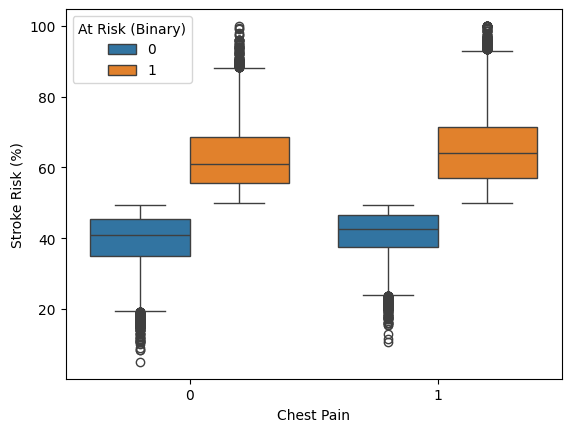

In [26]:

sns.boxplot(data=df, x='Chest Pain', y='Stroke Risk (%)', hue='At Risk (Binary)')

- Patients without chest pain (Chest Pain = 0) show a wider spread of Stroke Risk for both risk groups. However, those labeled as "At Risk" tend to have median stroke risks around 60%-65%, whereas those "Not At Risk" have a median stroke risk near 40%-45%.

- Patients with chest pain (Chest Pain = 1) exhibit a similar pattern, but the "At Risk" group has a slightly higher median and upper quartile compared to the non-chest pain group.

- Both groups (chest pain = 0 and chest pain = 1) show clear separation between the "At Risk" and "Not At Risk" categories in terms of stroke risk values, reinforcing that the binary risk label closely follows the stroke risk percentage.

- Interestingly, chest pain presence does not drastically shift the distribution of stroke risk when comparing individuals within the same risk group. This suggests that chest pain alone may not be a major determinant of stroke risk but could be a contributing factor in conjunction with other symptoms.

- While chest pain does correlate with slightly higher stroke risk in the "At Risk" group, it is not the sole driving feature. The "At Risk" classification appears heavily influenced by the stroke risk percentage itself, rather than just the presence of chest pain.

- Many people labeled as "At Risk" (higher stroke risk) tend to also report chest pain at a noticeable rate.

- However, chest pain alone is not a definitive indicator—there are people with chest pain who are not classified as "At Risk", meaning chest pain appears in both low and high stroke risk groups.

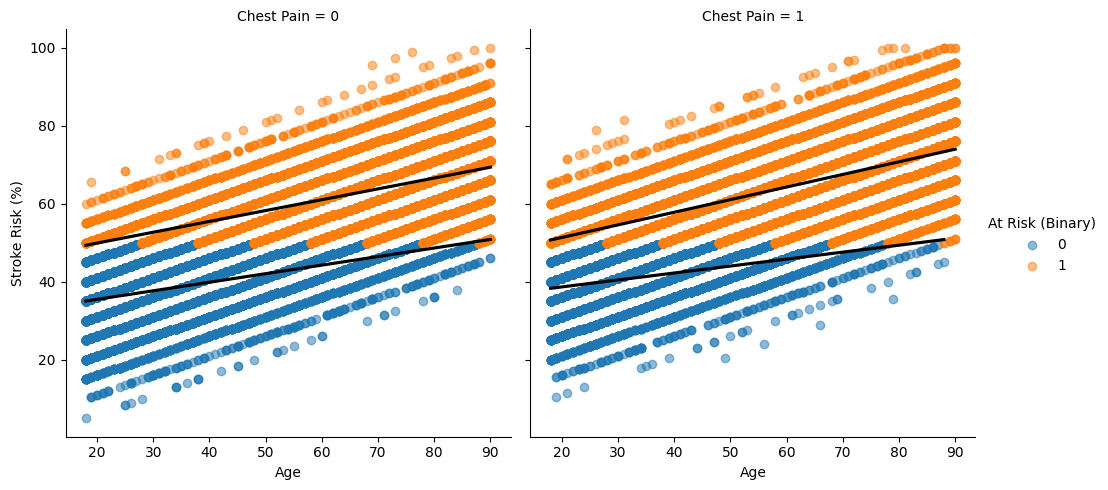

In [27]:
sns.lmplot(
    x='Age',
    y='Stroke Risk (%)',
    hue='At Risk (Binary)',
    col='Chest Pain',
    data=df,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'black'},
    height=5,
    aspect=1
)

- Chest pain does appear to have an amplifying effect on stroke risk but is not the sole determinant.

- Age is a contributing factor regardless of chest pain status.

- This supports the idea that while chest pain is associated with elevated stroke risk, not all high-risk individuals necessarily experience chest pain.

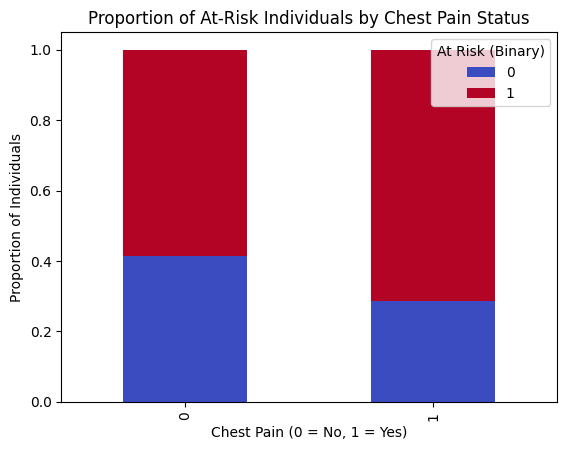

In [28]:
risk_counts = pd.crosstab(df['Chest Pain'], df['At Risk (Binary)'], normalize='index')

# Plot the stacked bar chart
risk_counts.plot(kind='bar', stacked=True, colormap='coolwarm')

# Add labels and title
plt.xlabel("Chest Pain (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Individuals")
plt.title("Proportion of At-Risk Individuals by Chest Pain Status")
plt.legend(title="At Risk (Binary)", loc="upper right")

# Show plot
plt.show()

Individuals with chest pain have a higher proportion of being at risk for stroke

In [29]:
symptom_cols = [
    'Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat', 'Fatigue & Weakness',
    'Dizziness', 'Swelling (Edema)', 'Pain in Neck/Jaw/Shoulder/Back',
    'Excessive Sweating', 'Persistent Cough', 'Nausea/Vomiting',
    'High Blood Pressure', 'Chest Discomfort (Activity)', 'Cold Hands/Feet',
    'Snoring/Sleep Apnea', 'Anxiety/Feeling of Doom'
]

In [30]:
from scipy.stats import chi2_contingency

for col in symptom_cols:
    contingency = pd.crosstab(df[col], df['At Risk (Binary)'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f}")


Chest Pain: p-value = 0.0000
Shortness of Breath: p-value = 0.0000
Irregular Heartbeat: p-value = 0.0000
Fatigue & Weakness: p-value = 0.0000
Dizziness: p-value = 0.0000
Swelling (Edema): p-value = 0.0000
Pain in Neck/Jaw/Shoulder/Back: p-value = 0.0000
Excessive Sweating: p-value = 0.0000
Persistent Cough: p-value = 0.0000
Nausea/Vomiting: p-value = 0.0000
High Blood Pressure: p-value = 0.0000
Chest Discomfort (Activity): p-value = 0.0000
Cold Hands/Feet: p-value = 0.0000
Snoring/Sleep Apnea: p-value = 0.0000
Anxiety/Feeling of Doom: p-value = 0.0000


-- Each symptom is significantly associated with stroke risk

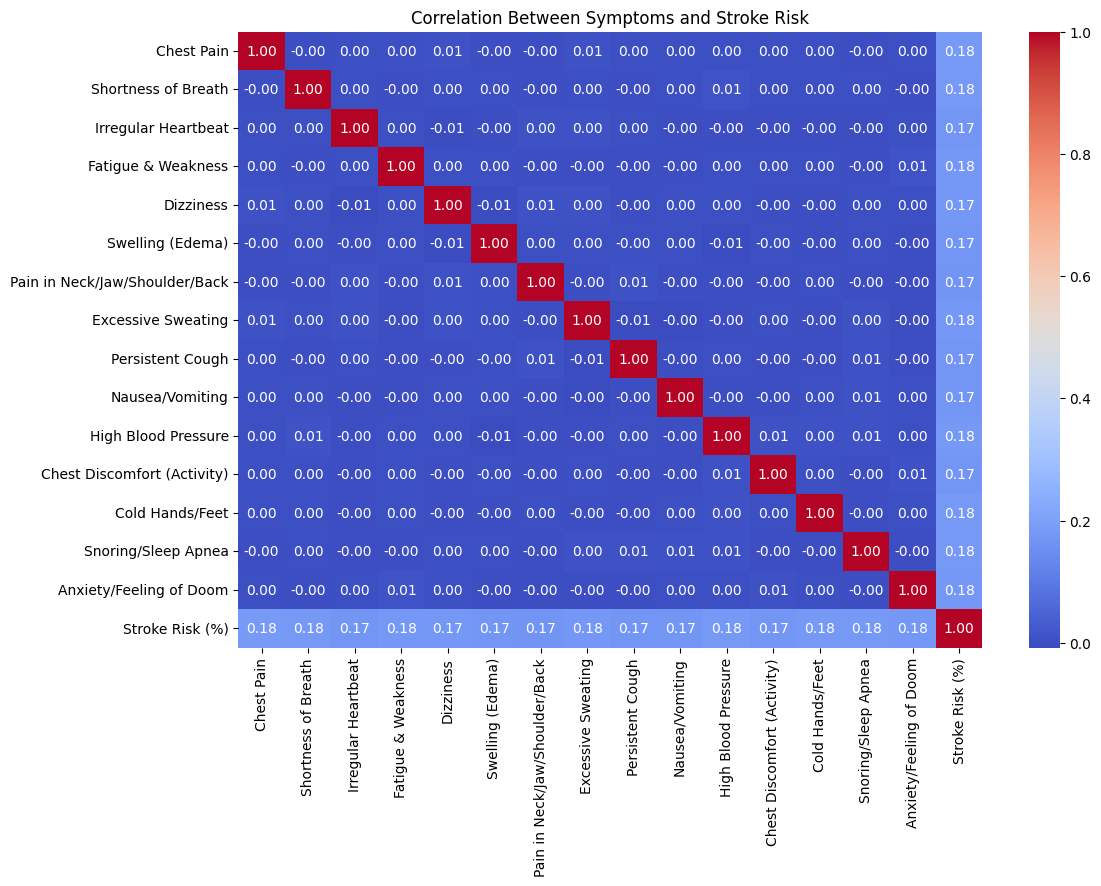

In [31]:
symptoms = [
    'Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
    'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
    'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
    'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
    'Chest Discomfort (Activity)', 'Cold Hands/Feet',
    'Snoring/Sleep Apnea', 'Anxiety/Feeling of Doom', 'Stroke Risk (%)'
]
corr = df[symptoms].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Symptoms and Stroke Risk")
plt.show()


- All symptoms have low positive correlation ~0.17–0.18 with Stroke Risk. This suggests that each symptom individually contributes a small but measurable signal toward stroke risk.

- Most values of symptom- symptom correlation are near 0, meaning symptoms are not strongly correlated with each other ---> low multicollinearity, each symptom is likely providing independent information.


The consistent weak correlation across symptoms might suggest that stroke risk is a complex function of many mild indicators — no single symptom is dominant.

This aligns well with the chi-square test results, meaning symptoms are statistically linked, even if the correlation is weak.

In [32]:
#severity score column
df['Symptom Severity Score'] = df[symptom_cols].sum(axis=1)
df

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,...,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary),LOF_outlier,is_outlier,Symptom Severity Score
0,0,1,1,1,0,0,0,1,1,1,...,1,1,0,0,54,58.0,1,1,0,8
1,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,49,40.5,0,1,0,5
2,1,0,0,1,1,1,0,0,1,0,...,0,0,1,0,62,52.0,1,1,0,6
3,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,48,60.0,1,1,0,9
4,0,0,1,0,0,1,0,1,0,1,...,0,0,1,1,61,56.5,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,0,0,0,0,0,0,1,0,1,...,1,0,0,1,18,30.0,0,1,0,6
69996,0,0,0,1,0,1,0,1,0,0,...,1,1,1,0,24,33.0,0,1,0,6
69997,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,49,45.5,0,1,0,6
69998,0,1,1,1,1,0,0,0,0,0,...,1,1,1,0,45,48.5,0,1,0,7


<Axes: xlabel='At Risk (Binary)', ylabel='Symptom Severity Score'>

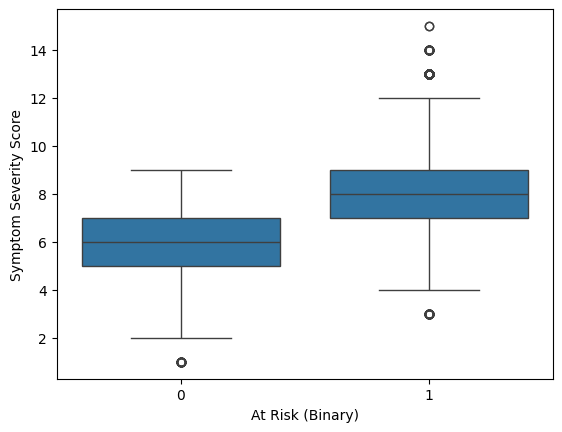

In [33]:
sns.boxplot(data=df, x='At Risk (Binary)', y='Symptom Severity Score')


- The median severity score is higher for the "At Risk" group.

- There's a visible shift upward in the distribution, suggesting a clear pattern: Higher Symptom Severity → Higher Stroke Risk

Text(0.5, 1.0, 'Symptom Prevalence by Risk Group')

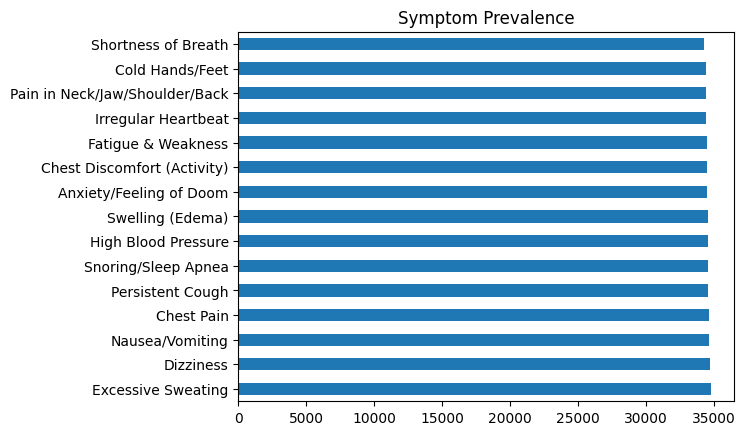

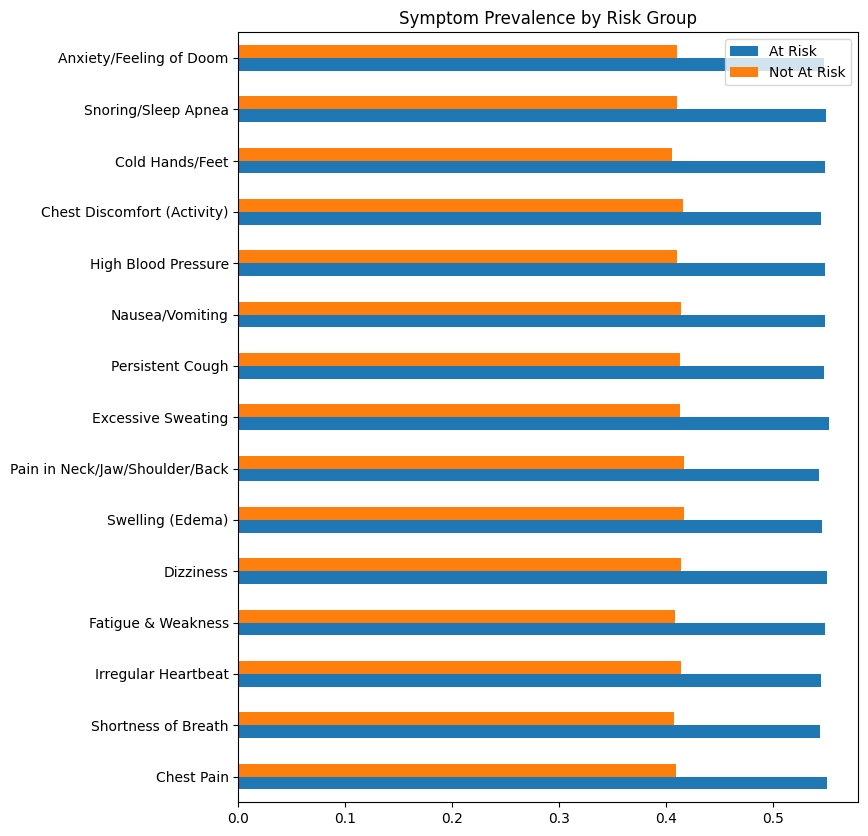

In [34]:
#Symptom prevalence overall
symptom_counts = df[symptom_cols].sum().sort_values(ascending=False)
symptom_counts.plot(kind='barh')
plt.title("Symptom Prevalence")

#Prevalence by risk group
at_risk = df[df['At Risk (Binary)'] == 1][symptom_cols].mean()
not_at_risk = df[df['At Risk (Binary)'] == 0][symptom_cols].mean()

pd.DataFrame({
    'At Risk': at_risk,
    'Not At Risk': not_at_risk
}).plot(kind='barh', figsize=(8, 10))
plt.title("Symptom Prevalence by Risk Group")


In [35]:
bins = [0, 30, 50, 70, 120]
labels = ['0–30', '31–50', '51–70', '70+']

#Creating age group column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#mean stroke risk per age group
age_group_risk = df.groupby('Age Group')['Stroke Risk (%)'].mean()
print(age_group_risk)

Age Group
0–30     40.302333
31–50    48.273110
51–70    58.351562
70+      68.484342
Name: Stroke Risk (%), dtype: float64


<ipython-input-35-4cb1b33e3b41>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_risk = df.groupby('Age Group')['Stroke Risk (%)'].mean()


#Data Pre-processing

In [36]:
#One-hot encoded 'Age Group'
df = pd.get_dummies(df, columns=['Age Group'], drop_first=True)

In [37]:
#checking class balance
df['At Risk (Binary)'].value_counts(normalize=True)


,proportion
At Risk (Binary),
1,0.649212
0,0.350788


-- Data is mildly imbalanced

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['At Risk (Binary)'])
y = df['At Risk (Binary)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4839
           1       1.00      1.00      1.00      8957

    accuracy                           1.00     13796
   macro avg       1.00      1.00      1.00     13796
weighted avg       1.00      1.00      1.00     13796

[[4839    0]
 [   0 8957]]


****************************************************

---



In [40]:
outliers=detect_outliers(df,0,['Age'])
print(list(outliers))

[]


In [41]:
outliers_stroke=detect_outliers(df,0,['Stroke Risk (%)'])
print(list(outliers_stroke))


#القيم دي مش
# outliers
# لانها مش متحويله اللي نسبه مئويه بالتالي لازم تتحول واشوف من تاني
#outliers

#The values below are the indices (row numbers) not the outlier values themselves

[2498, 6423, 8544, 8772, 8962, 9703, 11166, 13671, 15404, 18267, 18394, 20573, 21974, 23307, 23612, 23617, 25114, 25271, 25342, 26138, 26910, 27524, 27835, 28470, 30191, 30459, 31410, 33273, 33784, 34050, 34746, 34927, 37296, 38862, 39801, 40035, 40110, 41976, 45860, 46598, 47155, 47381, 47641, 47721, 48266, 48279, 48425, 49261, 49700, 50504, 51470, 52532, 52841, 53136, 53552, 53583, 53683, 53684, 54553, 54931, 55759, 55889, 56186, 56411, 56515, 58128, 61361, 64253, 65189, 68195]


In [42]:
df.loc[outliers_stroke, ['Stroke Risk (%)', 'Age']]

,Stroke Risk (%),Age
2498,100.0,88
6423,98.5,85
8544,98.0,84
8772,100.0,78
8962,97.5,83
...,...,...
58128,97.0,82
61361,13.0,24
64253,13.0,34
65189,99.5,87


In [43]:
len(outliers_stroke)

70

In [44]:
df[df['Stroke Risk (%)']== 6423]

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,...,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary),LOF_outlier,is_outlier,Symptom Severity Score,Age Group_31–50,Age Group_51–70,Age Group_70+


In [45]:
df['Stroke Risk (%)']=df['Stroke Risk (%)'].apply(lambda x:x/100 if x>100 else x)



In [46]:
df['Stroke Risk (%)'].unique()

array([ 58. ,  40.5,  52. ,  60. ,  56.5,  43. ,  68. ,  54.5,  31. ,
        60.5,  74.5,  67.5,  47.5,  63. ,  76.5,  52.5,  66. ,  94.5,
        34. ,  58.5,  62.5,  45. ,  50.5,  48. ,  69. ,  51.5,  44.5,
        64. ,  77.5,  69.5,  79. ,  49.5,  65.5,  37.5,  19.5,  31.5,
        41. ,  59. ,  55. ,  20.5,  70.5,  55.5,  46.5,  62. ,  63.5,
        45.5,  36.5,  48.5,  29. ,  35.5,  33.5,  71.5,  32.5,  44. ,
        61. ,  56. ,  82. ,  28.5,  46. ,  73. ,  47. ,  61.5,  38.5,
        53. ,  34.5,  70. ,  33. ,  76. ,  26.5,  51. ,  59.5,  40. ,
        71. ,  86. ,  54. ,  80.5,  50. ,  37. ,  68.5,  53.5,  75.5,
        79.5,  39. ,  28. ,  57. ,  32. ,  30. ,  49. ,  89.5,  81.5,
        73.5,  29.5,  78. ,  36. ,  35. ,  57.5,  42. ,  90. ,  74. ,
        38. ,  30.5,  64.5,  43.5,  65. ,  27.5,  80. ,  41.5,  75. ,
        83. ,  22. ,  87.5,  42.5,  81. ,  15.5,  25.5,  66.5,  72.5,
        39.5,  78.5,  86.5,  20. ,  72. ,  84. ,  21.5,  77. ,  25. ,
        83.5,  27. ,

In [47]:
df[df['Stroke Risk (%)']==( 8772)/100]

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,...,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary),LOF_outlier,is_outlier,Symptom Severity Score,Age Group_31–50,Age Group_51–70,Age Group_70+


In [48]:
df[df['Stroke Risk (%)']==( 8772)/100]

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,...,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary),LOF_outlier,is_outlier,Symptom Severity Score,Age Group_31–50,Age Group_51–70,Age Group_70+


In [49]:
#بعد التحويل الي نسب مئويه اشوف القيم الشاذه تاني
outliers_stroke2=detect_outliers(df,0,['Stroke Risk (%)'])
print(list(outliers_stroke2))
#الكود بيظهر النسب غير محوله تاني

[2498, 6423, 8544, 8772, 8962, 9703, 11166, 13671, 15404, 18267, 18394, 20573, 21974, 23307, 23612, 23617, 25114, 25271, 25342, 26138, 26910, 27524, 27835, 28470, 30191, 30459, 31410, 33273, 33784, 34050, 34746, 34927, 37296, 38862, 39801, 40035, 40110, 41976, 45860, 46598, 47155, 47381, 47641, 47721, 48266, 48279, 48425, 49261, 49700, 50504, 51470, 52532, 52841, 53136, 53552, 53583, 53683, 53684, 54553, 54931, 55759, 55889, 56186, 56411, 56515, 58128, 61361, 64253, 65189, 68195]


In [50]:
max(outliers_stroke2)

68195

In [51]:
min(outliers_stroke2)

2498

In [52]:
#df.loc[df['Stroke Risk (%)'] >=2498,'Stroke Risk (%)']/=100

outliers_stroke2 = detect_outliers(df, 0, ['Stroke Risk (%)'])
print(list(outliers_stroke2))


# نفس مشكله القيم الشاذه موجود

[2498, 6423, 8544, 8772, 8962, 9703, 11166, 13671, 15404, 18267, 18394, 20573, 21974, 23307, 23612, 23617, 25114, 25271, 25342, 26138, 26910, 27524, 27835, 28470, 30191, 30459, 31410, 33273, 33784, 34050, 34746, 34927, 37296, 38862, 39801, 40035, 40110, 41976, 45860, 46598, 47155, 47381, 47641, 47721, 48266, 48279, 48425, 49261, 49700, 50504, 51470, 52532, 52841, 53136, 53552, 53583, 53683, 53684, 54553, 54931, 55759, 55889, 56186, 56411, 56515, 58128, 61361, 64253, 65189, 68195]


In [53]:
outliers_stroke2 = detect_outliers(df, 0, ['Stroke Risk (%)'])
df_cleaned = df.drop(outliers_stroke2, axis=0).reset_index(drop=True)

df_cleaned


,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,...,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary),LOF_outlier,is_outlier,Symptom Severity Score,Age Group_31–50,Age Group_51–70,Age Group_70+
0,0,1,1,1,0,0,0,1,1,1,...,0,54,58.0,1,1,0,8,False,True,False
1,0,0,1,0,0,1,0,0,0,0,...,0,49,40.5,0,1,0,5,True,False,False
2,1,0,0,1,1,1,0,0,1,0,...,0,62,52.0,1,1,0,6,False,True,False
3,1,0,1,1,0,1,1,1,1,1,...,0,48,60.0,1,1,0,9,True,False,False
4,0,0,1,0,0,1,0,1,0,1,...,1,61,56.5,1,1,0,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68904,1,0,0,0,0,0,0,1,0,1,...,1,18,30.0,0,1,0,6,False,False,False
68905,0,0,0,1,0,1,0,1,0,0,...,0,24,33.0,0,1,0,6,False,False,False
68906,1,1,0,1,1,1,0,0,0,0,...,0,49,45.5,0,1,0,6,True,False,False
68907,0,1,1,1,1,0,0,0,0,0,...,0,45,48.5,0,1,0,7,True,False,False


<Axes: xlabel='Stroke Risk (%)'>

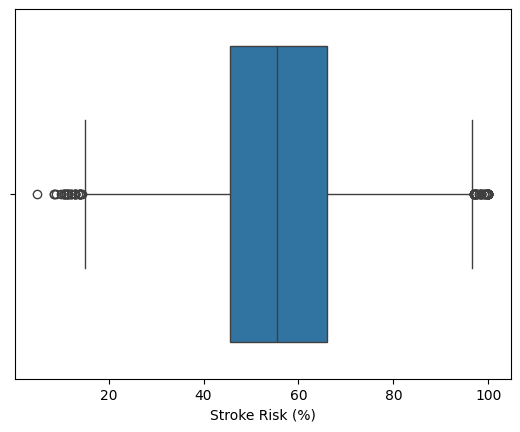

In [54]:
sns.boxplot(x=df['Stroke Risk (%)'])
#معرفش القيم

<Axes: xlabel='Stroke Risk (%)', ylabel='Count'>

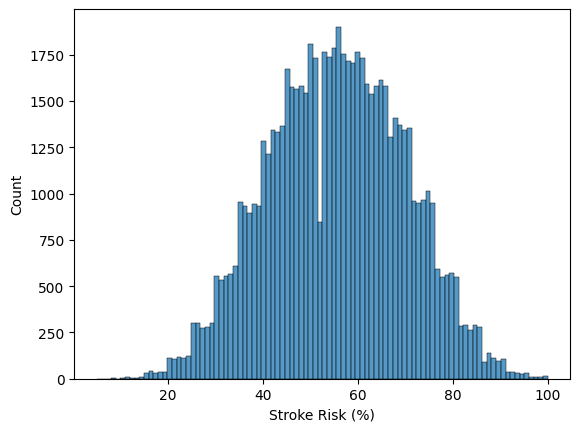

In [55]:
sns.histplot(df['Stroke Risk (%)'])

## stroke Risk && **Age**

<Axes: xlabel='Age', ylabel='Stroke Risk (%)'>

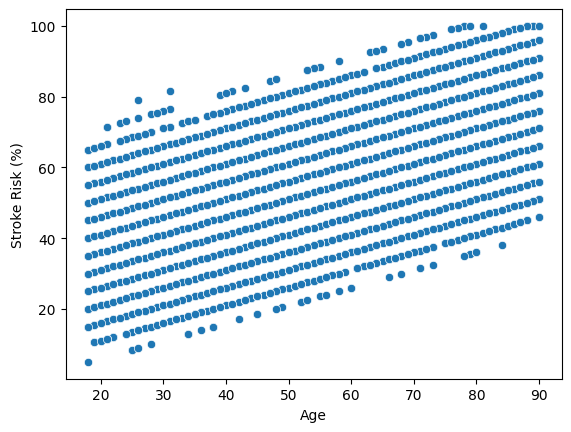

In [56]:
# Stroke Risk (%)  && Age




sns.scatterplot(x=df['Age'],y=df['Stroke Risk (%)'])

In [57]:
df['At Risk (Binary)'].value_counts()

,count
At Risk (Binary),
1,44782
0,24197


<Axes: xlabel='At Risk (Binary)', ylabel='count'>

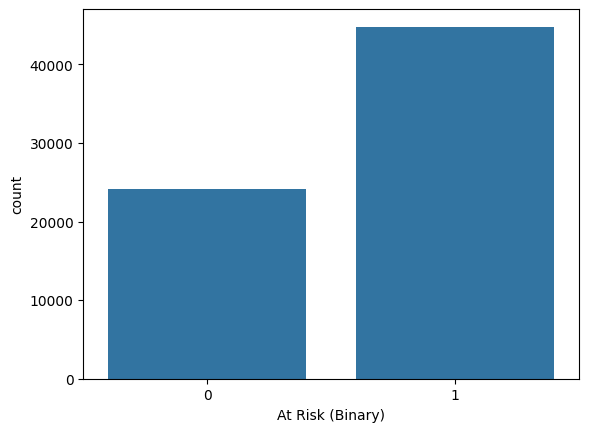

In [58]:
sns.countplot(x=df['At Risk (Binary)'])

<Axes: xlabel='At Risk (Binary)', ylabel='count'>

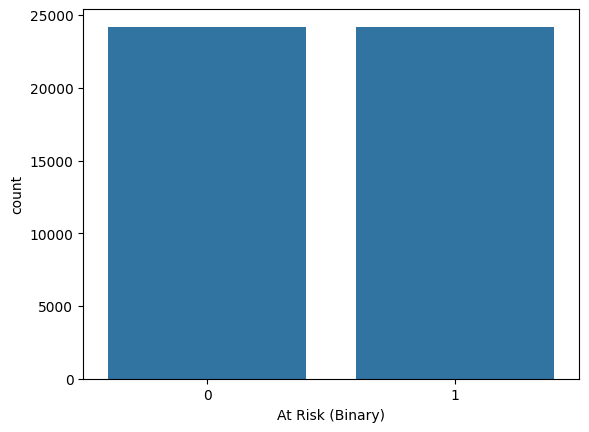

In [59]:
df_majority = df[df['At Risk (Binary)'] == 1]
df_minority = df[df['At Risk (Binary)'] == 0]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

sns.countplot(x=df_balanced['At Risk (Binary)'])


<Axes: xlabel='Age', ylabel='Stroke Risk (%)'>

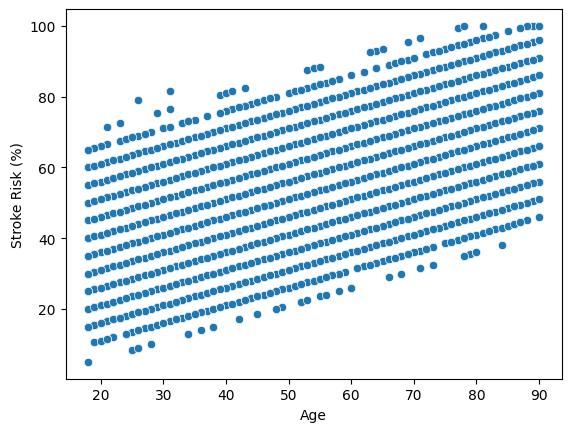

In [60]:
sns.scatterplot(x=df_balanced['Age'],y=df_balanced['Stroke Risk (%)'])

In [61]:
df_balanced




,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,...,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary),LOF_outlier,is_outlier,Symptom Severity Score,Age Group_31–50,Age Group_51–70,Age Group_70+
13189,0,0,0,1,0,1,1,1,0,1,...,0,48,50.0,1,1,0,7,True,False,False
19700,1,1,0,1,1,0,1,0,1,1,...,1,45,58.5,1,1,0,9,True,False,False
41280,0,0,0,1,0,1,1,0,1,1,...,1,68,65.0,1,1,0,8,False,True,False
56354,1,0,0,0,0,0,1,0,1,0,...,0,82,52.0,1,1,0,4,False,False,True
13709,1,1,1,0,1,0,1,0,0,0,...,1,28,50.0,1,1,0,9,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69989,0,0,0,0,1,0,0,0,1,1,...,1,21,36.5,0,1,0,7,False,False,False
69995,1,0,0,0,0,0,0,1,0,1,...,1,18,30.0,0,1,0,6,False,False,False
69996,0,0,0,1,0,1,0,1,0,0,...,0,24,33.0,0,1,0,6,False,False,False
69997,1,1,0,1,1,1,0,0,0,0,...,0,49,45.5,0,1,0,6,True,False,False


In [62]:
df_balanced.columns

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)', 'At Risk (Binary)',
       'LOF_outlier', 'is_outlier', 'Symptom Severity Score',
       'Age Group_31–50', 'Age Group_51–70', 'Age Group_70+'],
      dtype='object')

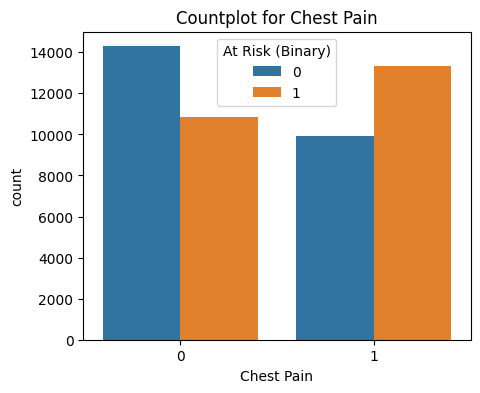

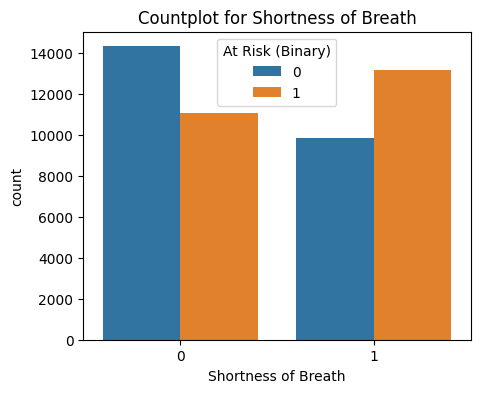

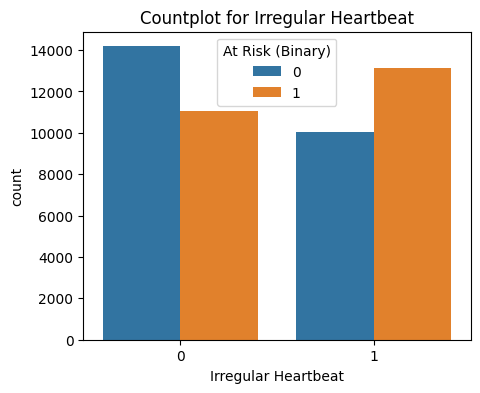

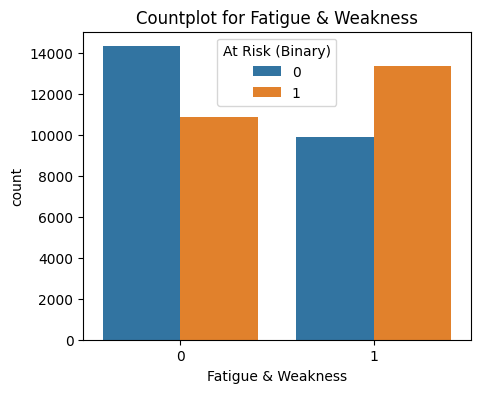

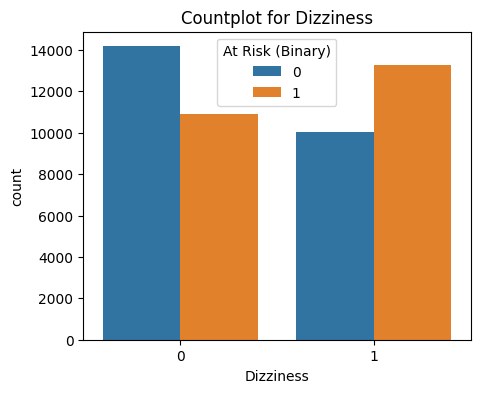

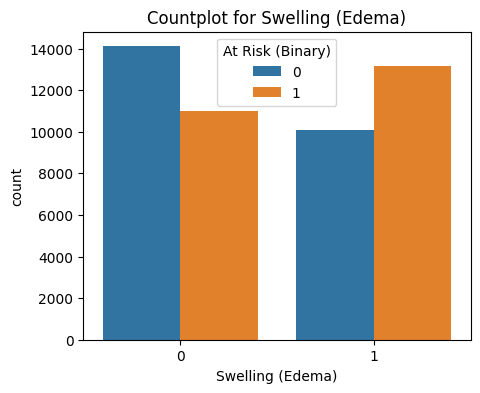

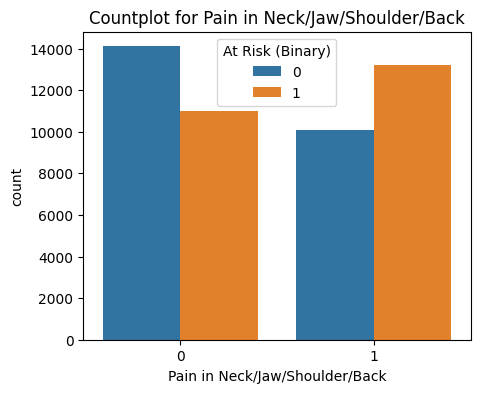

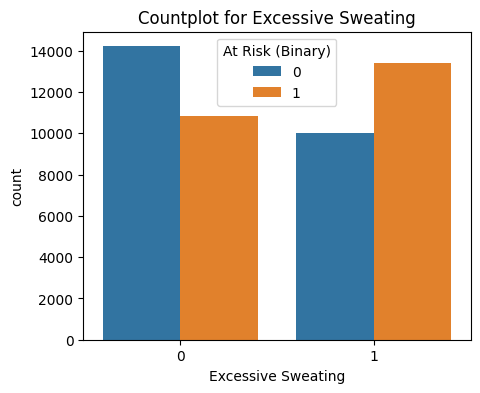

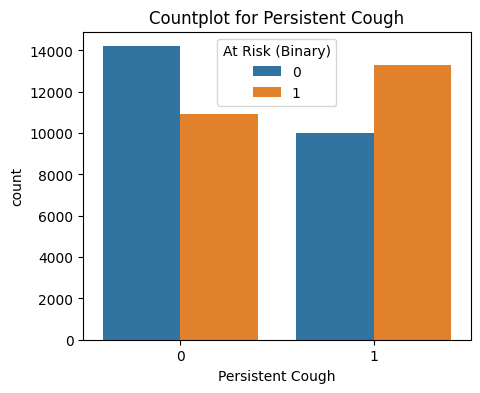

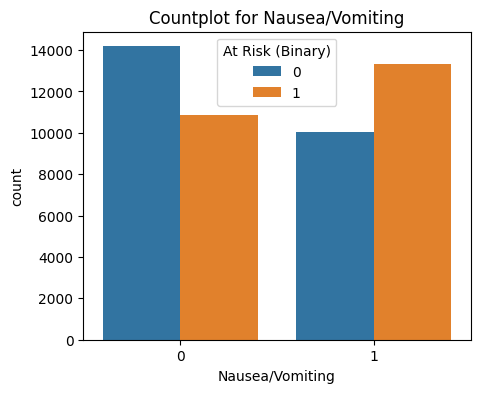

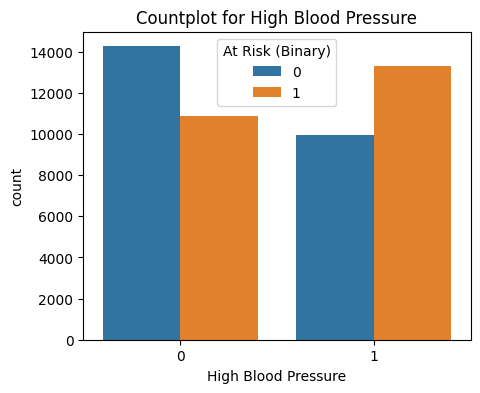

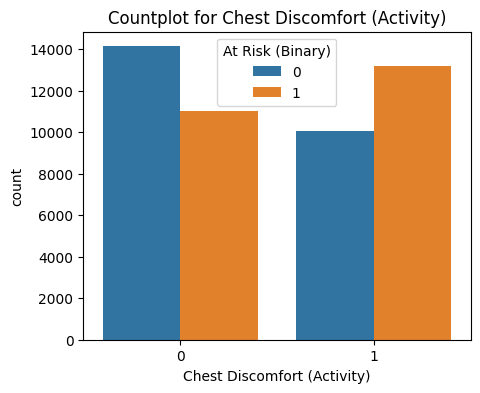

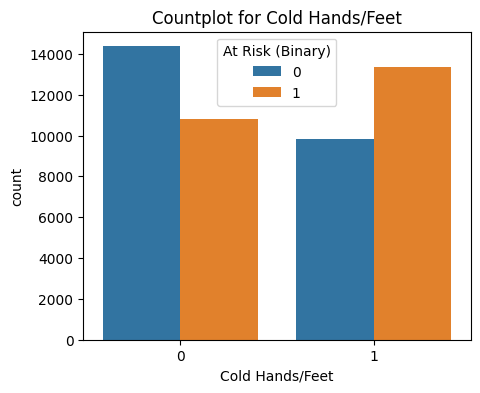

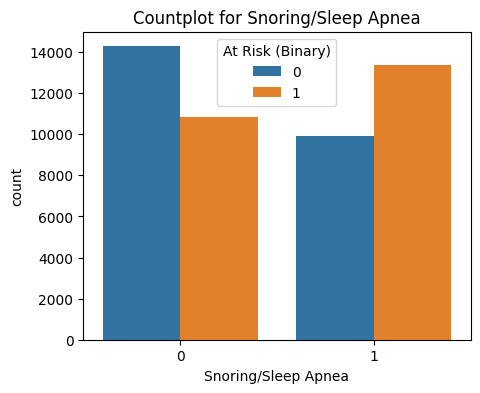

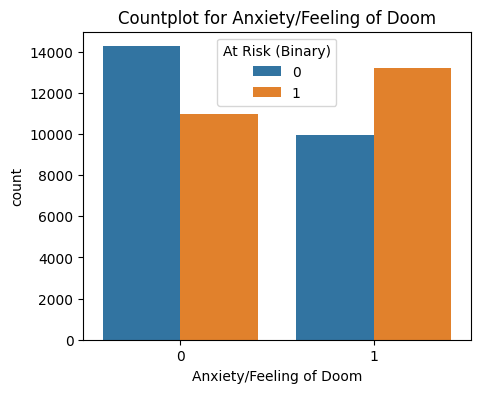

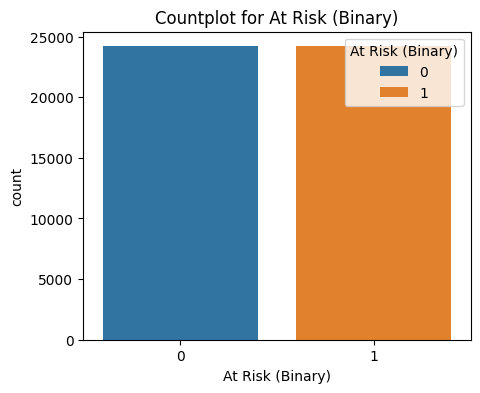

In [63]:
columns=['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom',
       'At Risk (Binary)']

for col in columns:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=df_balanced[col],hue=df_balanced['At Risk (Binary)'])
    plt.title(f'Countplot for {col}')
    plt.show()

<Axes: >

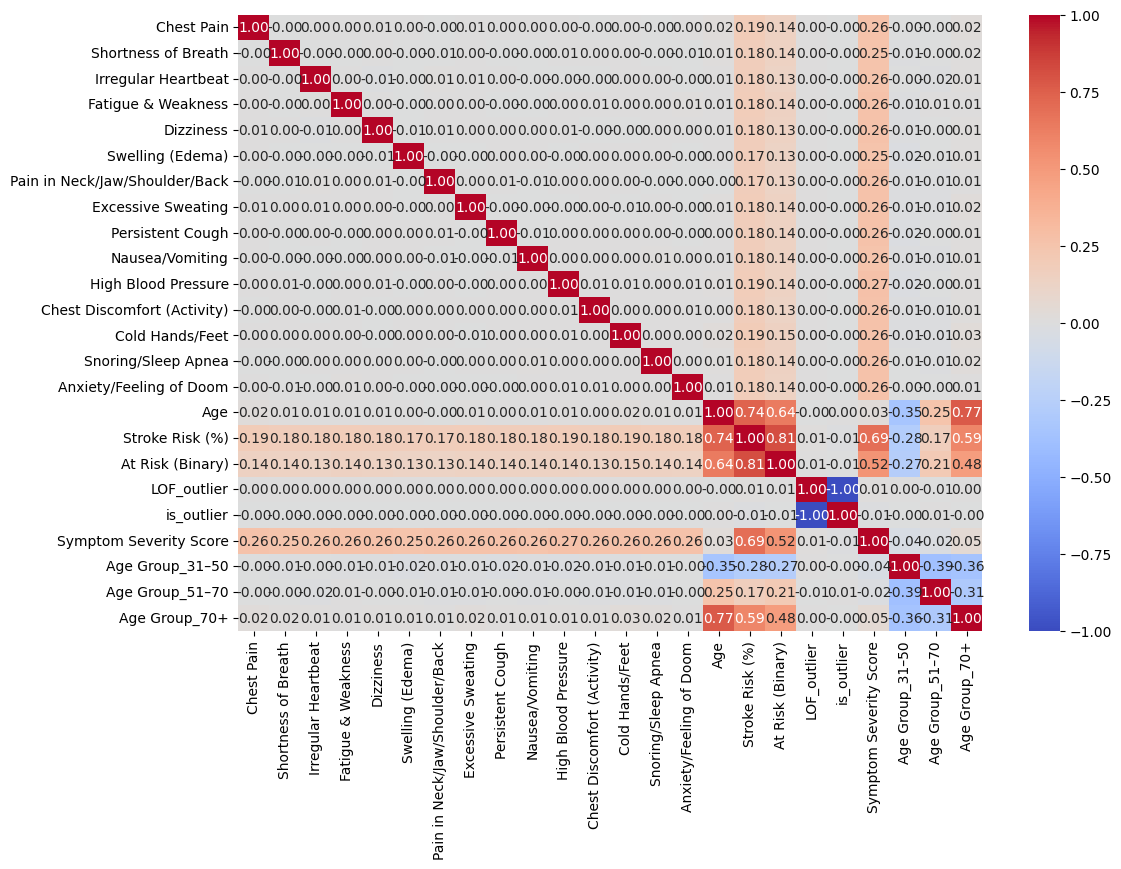

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_balanced.corr(), annot=True, cmap='coolwarm', fmt=".2f")

<Axes: xlabel='At Risk (Binary)', ylabel='Chest Pain'>

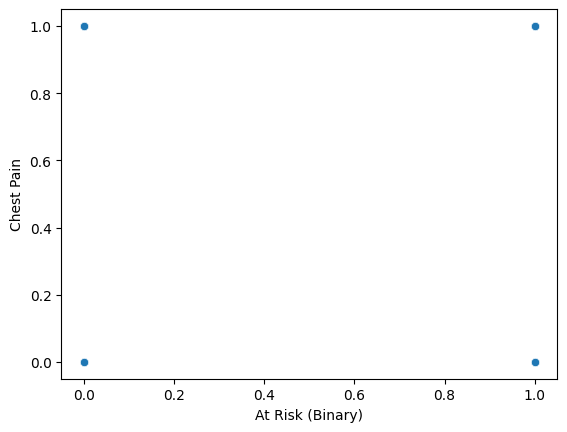

In [65]:
sns.scatterplot(y=df_cleaned['Chest Pain'],x=df_cleaned['At Risk (Binary)'])
#فعلا مافيش علاقه بين الالم ف الصدر ومخاطر الاصابه


<Axes: xlabel='Chest Pain', ylabel='count'>

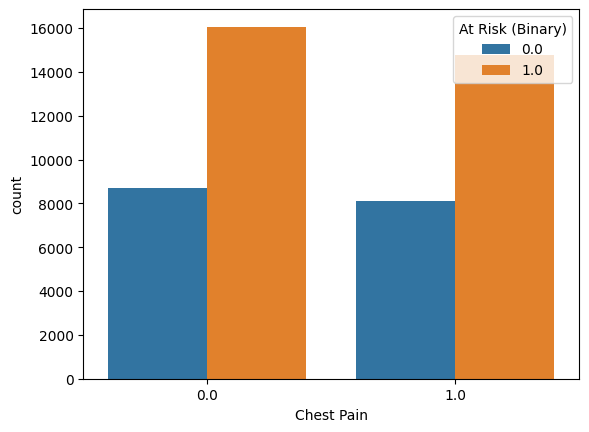

In [66]:
sns.countplot(x=df_balanced['Chest Pain'],hue=df_cleaned['At Risk (Binary)'])

In [67]:
print(df_balanced['Chest Pain'].value_counts())
print(df_balanced['At Risk (Binary)'].value_counts())

# الفرق مش كبير بينهم بيقي مافيش علاقه بينهم

Chest Pain
0    25156
1    23238
Name: count, dtype: int64
At Risk (Binary)
1    24197
0    24197
Name: count, dtype: int64


In [68]:
df_balanced['Chest Pain'].value_counts()

,count
Chest Pain,
0,25156
1,23238


In [69]:
st=df_balanced.groupby('Chest Pain')['Stroke Risk (%)'].value_counts()

In [70]:
#sns.de

In [71]:
#df_balanced.columns

In [72]:

#Train and test (Preparing data for training and testing the model)

from sklearn.model_selection import train_test_split
X = df.drop('Stroke Risk (%)', axis=1)
y = df['Stroke Risk (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [73]:
# Training the model to predict the hazard ratio
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
#Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.00
R-squared: 1.00


In [75]:
#Adjust and improve model performance
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [76]:
#Training the model to predict the probability of infection
!pip install xgboost scikit-learn pandas
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

X = df.drop('Stroke Risk (%)', axis=1)
y = df['Stroke Risk (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer

y_train = (y_train > 50).astype(int)
y_test = (y_test > 50).astype(int)
model = LogisticRegression(solver='saga', max_iter=500)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, solver='saga')

In [78]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [79]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3202.89
R-squared: -52850.05


In [80]:
import joblib
joblib.dump(best_model, 'stroke_prediction_model.pkl')

['stroke_prediction_model.pkl']

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Stroke Risk (%)', axis=1)
y = (df['Stroke Risk (%)'] > 50).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

joblib.dump(model, 'stroke_prediction_classifier.pkl')


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4962
           1       1.00      1.00      1.00      8834

    accuracy                           1.00     13796
   macro avg       1.00      1.00      1.00     13796
weighted avg       1.00      1.00      1.00     13796



['stroke_prediction_classifier.pkl']

Confusion Matrix:
 [[4935   27]
 [   0 8834]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4962
           1       1.00      1.00      1.00      8834

    accuracy                           1.00     13796
   macro avg       1.00      1.00      1.00     13796
weighted avg       1.00      1.00      1.00     13796



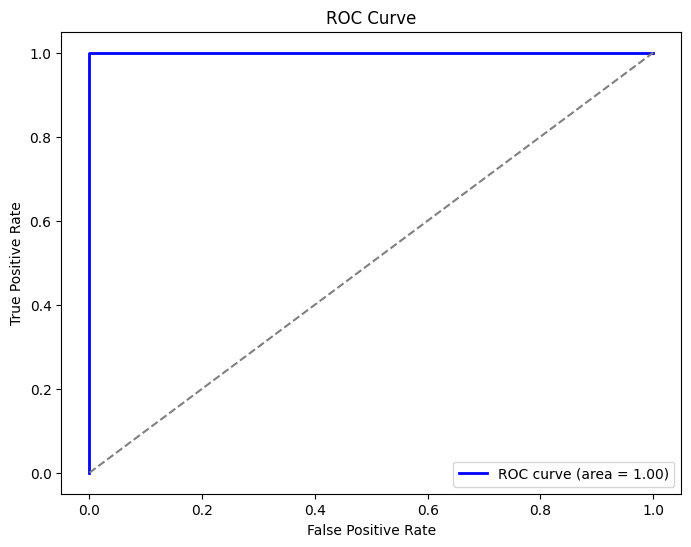

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")

Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
Mean Absolute Error (MAE): 0.00
R-squared (R² Score): 0.99


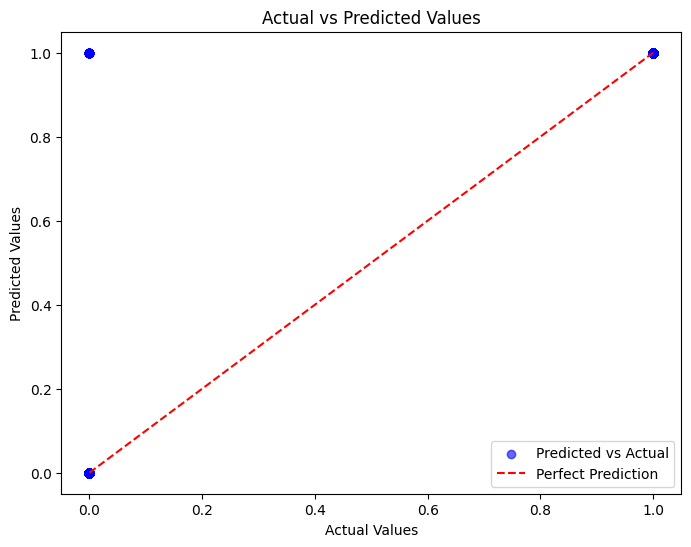

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


In [85]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Neural Network Accuracy: 1.00


In [86]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[4911   51]
 [  10 8824]]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4962
           1       0.99      1.00      1.00      8834

    accuracy                           1.00     13796
   macro avg       1.00      0.99      1.00     13796
weighted avg       1.00      1.00      1.00     13796



In [88]:
import joblib
joblib.dump(mlp, 'mlp_model.pkl')

['mlp_model.pkl']

In [89]:
!pip install pyngrok
!ngrok authtoken 2viZCvIJBVs5Fx5ZwSNNrvCjUrc_7eSLNTksuyu8JWhzzX4KM

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [90]:
from pyngrok import ngrok
public_url = ngrok.connect(5000).public_url
print(f"ngrok tunnel: {public_url}")

ngrok tunnel: https://8e87-34-87-7-245.ngrok-free.app


In [91]:
import os # Import the os module

# Create the 'templates' directory if it doesn't exist
os.makedirs('templates', exist_ok=True)

with open('templates/index.html', 'w') as f:
    f.write("""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Stroke Prediction</title>
        <link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
    </head>
    <body>
        <h1>Stroke Prediction</h1>
        <form method="POST" action="/predict">
            <label>Age:</label>
            <input type="number" step="0.1" name="age" min="0" required><br>
            <label>High blood pressure (0 = No, 1 = Yes):</label>
            <select name="high blood pressure" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>
            <label>Irregular Heartbeat  (0 = No, 1 = Yes):</label>
            <select name="irregular_heartbeat" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>
            <label>Chest Pain (0 = No, 1 = Yes):</label>
            <select name="chest_pain" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>
            <label>Short Breath (0 = No, 1 = Yes):</label>
            <select name="short breath" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>
            <label for="swelling">Swelling (0 = No, 1 = Yes):</label>
            <select name="swelling" id="swelling" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>
             <label for="pain_neck_back_jaw_shoulder">Pain in Neck, Back, Shoulder, or Jaw (0 = No, 1 = Yes):</label>
             <select name="pain_neck_back_jaw_shoulder" id="pain_neck_back_jaw_shoulder" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
            </select><br>
             <label for="chest_discomfort">Chest Discomfort (0 = No, 1 = Yes):</label>
             <select name="chest_discomfort" id="chest_discomfort" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="excersize_sweating">Exercise Sweating (0 = No, 1 = Yes):</label>
             <select name="excersize_sweating" id="excersize_sweating" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="nausea">Nausea (0 = No, 1 = Yes):</label>
             <select name="nausea" id="nausea" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="cold_feet_hands">Cold Feet and Hands (0 = No, 1 = Yes):</label>
             <select name="cold_feet_hands" id="cold_feet_hands" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>

             <label for="snoring">Snoring (0 = No, 1 = Yes):</label>
             <select name="snoring" id="snoring" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="cough">Cough (0 = No, 1 = Yes):</label>
             <select name="cough" id="cough" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="fatigue_weakness">Fatigue and Weakness (0 = No, 1 = Yes):</label>
             <select name="fatigue_weakness" id="fatigue_weakness" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>

             <label for="dizziness">Dizziness (0 = No, 1 = Yes):</label>
             <select name="dizziness" id="dizziness" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
            </select><br>
        </form>
        {% if prediction_text %}
        <h2>{{ prediction_text }}</h2>
        {% endif %}
    </body>
    </html>
    """)
print("index.html created")

index.html created


In [92]:
with open('templates/index.html', 'w') as f:
    f.write("""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Stroke Prediction</title>
        <link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
    </head>
    <body>
        <h1>Stroke Prediction</h1>
        <form method="POST" action="/predict">
            <label>Age:</label>
            <input type="number" step="0.1" name="age" min="0" required><br>
            <label>High blood pressure (0 = No, 1 = Yes):</label>
            <select name="high blood pressure" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>
            <label>Irregular Heartbeat (0 = No, 1 = Yes):</label>
            <select name="irregular_heartbeat" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>
            <label>Chest Pain (0 = No, 1 = Yes):</label>
            <select name="chest_pain" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>
            <label>Short Breath (0 = No, 1 = Yes):</label>
            <select name="short breath" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>
            <label for="swelling">Swelling (0 = No, 1 = Yes):</label>
            <select name="swelling" id="swelling" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>
             <label for="pain_neck_back_jaw_shoulder">Pain in Neck, Back, Shoulder, or Jaw (0 = No, 1 = Yes):</label>
             <select name="pain_neck_back_jaw_shoulder" id="pain_neck_back_jaw_shoulder" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
            </select><br>
             <label for="chest_discomfort">Chest Discomfort (0 = No, 1 = Yes):</label>
             <select name="chest_discomfort" id="chest_discomfort" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="excersize_sweating">Exercise Sweating (0 = No, 1 = Yes):</label>
             <select name="excersize_sweating" id="excersize_sweating" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="nausea">Nausea (0 = No, 1 = Yes):</label>
             <select name="nausea" id="nausea" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="cold_feet_hands">Cold Feet and Hands (0 = No, 1 = Yes):</label>
             <select name="cold_feet_hands" id="cold_feet_hands" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>

             <label for="snoring">Snoring (0 = No, 1 = Yes):</label>
             <select name="snoring" id="snoring" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="cough">Cough (0 = No, 1 = Yes):</label>
             <select name="cough" id="cough" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
            <label for="fatigue_weakness">Fatigue and Weakness (0 = No, 1 = Yes):</label>
            <select name="fatigue_weakness" id="fatigue_weakness" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>

            <label for="dizziness">Dizziness (0 = No, 1 = Yes):</label>
            <select name="dizziness" id="dizziness" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
            </select><br>

        </form>
        {% if prediction_text %}
        <h2>{{ prediction_text }}</h2>
        {% endif %}
    </body>
    </html>
    """)
print("index.html created")

index.html created


In [93]:
import os
os.makedirs('templates', exist_ok=True)

with open('templates/index.html', 'w') as f:
    f.write("""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Stroke Prediction</title>
        <link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
    </head>
    <body>
        <h1>Stroke Prediction</h1>
        <form method="POST" action="/predict">
            <label>Gender:</label>
            <select name="gender" required>
                <option value="Male">Male</option>
                <option value="Female">Female</option>
            </select><br>

            <label>Age:</label>
            <input type="number" step="0.1" name="age" min="0" required><br>

            <label>High blood pressure (0 = No, 1 = Yes):</label>
            <select name="high blood pressure" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>

            <label>Irregular Heartbeat (0 = No, 1 = Yes):</label>
            <select name="irregular_heartbeat" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
            </select><br>

            <label>Ever Married:</label>
            <select name="ever_married" required>
                <option value="Yes">Yes</option>
                <option value="No">No</option>
            </select><br>

            <label>Work Type:</label>
            <select name="work_type" required>
                <option value="Private">Private</option>
                <option value="Self-employed">Self-employed</option>
                <option value="Govt_job">Govt_job</option>
                <option value="children">children</option>
                <option value="Never_worked">Never_worked</option>
            </select><br>

            <label>Residence Type:</label>
            <select name="Residence_type" required>
                <option value="Urban">Urban</option>
                <option value="Rural">Rural</option>
            </select><br>

             <label>Chest Pain (0 = No, 1 = Yes):</label>
             <select name="chest_pain" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
             </select><br>
             <label>Short Breath (0 = No, 1 = Yes):</label>
             <select name="short breath" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
             </select><br>
             <label for="fatigue_weakness">Fatigue and Weakness (0 = No, 1 = Yes):</label>
             <select name="fatigue_weakness" id="fatigue_weakness" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
             </select><br>

             <label for="dizziness">Dizziness (0 = No, 1 = Yes):</label>
             <select name="dizziness" id="dizziness" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="swelling">Swelling (0 = No, 1 = Yes):</label>
             <select name="swelling" id="swelling" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="pain_neck_back_jaw_shoulder">Pain in Neck, Back, Shoulder, or Jaw (0 = No, 1 = Yes):</label>
             <select name="pain_neck_back_jaw_shoulder" id="pain_neck_back_jaw_shoulder" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="chest_discomfort">Chest Discomfort (0 = No, 1 = Yes):</label>
             <select name="chest_discomfort" id="chest_discomfort" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="excersize_sweating">Exercise Sweating (0 = No, 1 = Yes):</label>
             <select name="excersize_sweating" id="excersize_sweating" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="nausea">Nausea (0 = No, 1 = Yes):</label>
             <select name="nausea" id="nausea" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="cold_feet_hands">Cold Feet and Hands (0 = No, 1 = Yes):</label>
             <select name="cold_feet_hands" id="cold_feet_hands" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>

             <label for="snoring">Snoring (0 = No, 1 = Yes):</label>
             <select name="snoring" id="snoring" required>
                 <option value="0">No</option>
                 <option value="1">Yes</option>
             </select><br>
             <label for="cough">Cough (0 = No, 1 = Yes):</label>
             <select name="cough" id="cough" required>
                <option value="0">No</option>
                <option value="1">Yes</option>
             </select><br>
             <label>Smoking Status:</label>
             <select name="smoking_status" required>
                <option value="formerly smoked">Formerly smoked</option>
                <option value="never smoked">Never smoked</option>
                <option value="smokes">Smokes</option>
                <option value="Unknown">Unknown</option>
             </select><br>

             <input type="submit" value="Predict Stroke Risk">
        </form>
        {% if prediction_text %}
        <h2>{{ prediction_text }}</h2>
        {% endif %}
    </body>
    </html>
    """)
print("index.html updated")

index.html updated


In [94]:
import os
os.makedirs('static', exist_ok=True)

with open('static/style.css', 'w') as f:
    f.write("""
    body {
        font-family: Arial, sans-serif;
        margin: 40px;
        background-color: #f4f4f4;
    }
    h1 {
        text-align: center;
        color: #333;
    }
    form {
        max-width: 600px;
        margin: auto;
        background: white;
        padding: 20px;
        border-radius: 8px;
        box-shadow: 0 0 10px rgba(0,0,0,0.1);
    }
    label {
        display: block;
        margin: 10px 0 5px;
    }
    input, select {
        width: 100%;
        padding: 8px;
        margin-bottom: 10px;
        border: 1px solid #ccc;
        border-radius: 4px;
    }
    input[type="submit"] {
        background-color: #4CAF50;
        color: white;
        border: none;
        padding: 10px;
        cursor: pointer;
    }
    input[type="submit"]:hover {
        background-color: #45a049;
    }
    h2 {
        text-align: center;
        margin-top: 20px;
    }
    """)
print("style.css created")

style.css created


In [ ]:
from flask import Flask, render_template, request
import joblib
import numpy as np
import pandas as pd
from pyngrok import ngrok

app = Flask(__name__)

# Load the model and preprocessors
try:
    model = joblib.load('/content/mlp_model.pkl')
    # Print expected features for debugging
    if hasattr(model, 'feature_names_in_'):
        print("Expected features:", model.feature_names_in_)
        print("Number of expected features:", len(model.feature_names_in_))
    else:
        print("Model does not have feature_names_in_ attribute.")
except FileNotFoundError:
    print("Error: model.pkl not found. Please upload the file.")
    model = None
except Exception as e:
    print(f"Error loading model: {e}")
    model = None

# Load scaler if used during training (uncomment if needed)
# try:
#     scaler = joblib.load('scaler.pkl')
# except FileNotFoundError:
#     print("Error: scaler.pkl not found. Please upload the file.")
#     scaler = None
# except Exception as e:
#     print(f"Error loading scaler: {e}")
#     scaler = None

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return render_template('index.html', prediction_text="Error: Model not loaded. Please ensure model.pkl is available.")

    try:
        # Collect form data
        features_dict = {
            'gender': request.form['gender'],
            'age': float(request.form['age']),
            'high blood pressure': int(request.form['high blood pressure']),
            'irregular_heartbeat': int(request.form['irregular_heartbeat']),
            'ever_married': request.form['ever_married'],
            'work_type': request.form['work_type'],
            'Residence_type': request.form['Residence_type'],
            'short breath': int(request.form['short breath']),
            'chest_pain': int(request.form['chest_pain']),
            'smoking_status': request.form['smoking_status'],
            'fatigue_weakness': int(request.form['fatigue_weakness']),
            'dizziness': int(request.form['dizziness']),
            'swelling': int(request.form['swelling']),
            'pain_neck_back_jaw_shoulder': int(request.form['pain_neck_back_jaw_shoulder']),
            'excersize_sweating': int(request.form['excersize_sweating']),
            'cough': int(request.form['cough']),
            'nausea': int(request.form['nausea']),
            'chest_discomfort': int(request.form['chest_discomfort']),
            'cold_feet_hands': int(request.form['cold_feet_hands']),
            'snoring': int(request.form['snoring'])}
        print(f"-------------- PRINTING FEATURES: {features_dict}")
        # Convert to DataFrame
        df = pd.DataFrame([features_dict])
        df_values=df.values
        column_values_dict = {}
        for column in df.columns:
            column_values_dict[column] = df[column].tolist()
        print("Dictionary of column values using iteration:")
        print(column_values_dict)
        print("\n")
        #chest_pain , dizziness , high blood pressure , irregular_heartbeat
        selected_values = df[['chest_pain', 'dizziness', 'high blood pressure', 'irregular_heartbeat']].values

        all_values = ['age', 'high blood pressure', 'irregular_heartbeat', 'chest_pain', 'dizziness', 'fatigue_weakness', 'swelling', 'excersize_sweating', 'cough', 'nausea', 'chest_discomfort', 'cold_feet_hands', 'snoring']

        print(f"-------------- PRINTING SELECTED VALUES: {selected_values}")
        # for i in range(len(selected_values)):
        #   # Iterate through each element in the sublist
        #     for j in range(len(selected_values[i])):
        # # Check if the value is 0, change to 1
        #         if features[i][j] == 0:
        #            features[i][j] = 1

        all_values_array = np.array(all_values)
        main_result = np.all(all_values_array == 1)
        arr = np.array(selected_values)
        result = np.all(arr == 1)
        if main_result == True:
            prediction = 1
        elif result == True:
            prediction = 1
        else:
            prediction = 0





        # One-hot encode categorical variables
        categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
        df_encoded = pd.get_dummies(df, columns=categorical_cols)
        # print(f"-------------- PRINTING ENCODED DATAFRAME: {df_encoded}")

        # Ensure the encoded DataFrame matches the model's expected features
        expected_features = model.feature_names_in_
        # print(f"-------------- PRINTING EXPECTED FEATURES: {expected_features}")
        for feature in expected_features:
            print(f"Checking feature: {feature}")
            if feature not in df_encoded.columns:
                df_encoded[feature] = 0  # Add missing features as 0
        df_encoded = df_encoded[expected_features]  # Reorder to match model's expectation

        # Convert to numpy array for prediction
        features = df_encoded.values
       # for fts in features:
        #    for ft in fts:
         #     if ft == 0:

               # print(f"-------------- PRINTING FT: {ft}")
            # print(f"-------------- PRINTING FEATURES: {fts}")
        # print(f"-------------- PRINTING FEATURES: {features}")
        # for i in range(len(features)):
        #   # Iterate through each element in the sublist
        #   for j in range(len(features[i])):
        # # Check if the value is 0, change to 1
        #     if features[i][j] == 0:
        #       features[i][j] = 1
        # Uncomment if your model requires scaled features
        # if scaler is not None:
        #     features = scaler.transform(features)
        # print(f"-------------- PRINTING FEATURES: {features}")
        # Predict using the model
        # prediction = model.predict(features)[0]
        print(f"-------------- PRINTING PREEDICT: {prediction}")
        result = "High Risk of Stroke" if prediction == 1 else "No Risk"

        return render_template('index.html', prediction_text=result)
    except KeyError as e:
        return render_template('index.html', prediction_text=f"Error: Missing form field {e}")
    except ValueError as e:
        return render_template('index.html', prediction_text=f"Error: Invalid input value {e}")
    except Exception as e:
        return render_template('index.html', prediction_text=f"Error: {e}")

if __name__ == '__main__':
    # Start ngrok tunnel
    public_url = ngrok.connect(5000).public_url
    print(f" * ngrok tunnel: {public_url}")

    # Update Flask to use the public URL
    app.config["BASE_URL"] = public_url

    # Run Flask app
    app.run(port=5000)

Expected features: ['Chest Pain' 'Shortness of Breath' 'Irregular Heartbeat'
 'Fatigue & Weakness' 'Dizziness' 'Swelling (Edema)'
 'Pain in Neck/Jaw/Shoulder/Back' 'Excessive Sweating' 'Persistent Cough'
 'Nausea/Vomiting' 'High Blood Pressure' 'Chest Discomfort (Activity)'
 'Cold Hands/Feet' 'Snoring/Sleep Apnea' 'Anxiety/Feeling of Doom' 'Age'
 'At Risk (Binary)' 'LOF_outlier' 'is_outlier' 'Symptom Severity Score'
 'Age Group_31–50' 'Age Group_51–70' 'Age Group_70+']
Number of expected features: 23
 * ngrok tunnel: https://1acf-34-87-7-245.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 11:43:35] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 11:43:36] "GET /static/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 11:43:36] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 11:43:42] "POST /predict HTTP/1.1" 200 -


-------------- PRINTING FEATURES: {'gender': 'Male', 'age': 22.0, 'high blood pressure': 0, 'irregular_heartbeat': 0, 'ever_married': 'Yes', 'work_type': 'Private', 'Residence_type': 'Urban', 'short breath': 0, 'chest_pain': 0, 'smoking_status': 'formerly smoked', 'fatigue_weakness': 0, 'dizziness': 0, 'swelling': 0, 'pain_neck_back_jaw_shoulder': 0, 'excersize_sweating': 0, 'cough': 0, 'nausea': 0, 'chest_discomfort': 0, 'cold_feet_hands': 0, 'snoring': 0}
Dictionary of column values using iteration:
{'gender': ['Male'], 'age': [22.0], 'high blood pressure': [0], 'irregular_heartbeat': [0], 'ever_married': ['Yes'], 'work_type': ['Private'], 'Residence_type': ['Urban'], 'short breath': [0], 'chest_pain': [0], 'smoking_status': ['formerly smoked'], 'fatigue_weakness': [0], 'dizziness': [0], 'swelling': [0], 'pain_neck_back_jaw_shoulder': [0], 'excersize_sweating': [0], 'cough': [0], 'nausea': [0], 'chest_discomfort': [0], 'cold_feet_hands': [0], 'snoring': [0]}


-------------- PRINTING

INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 11:43:43] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 11:44:15] "POST /predict HTTP/1.1" 200 -


-------------- PRINTING FEATURES: {'gender': 'Male', 'age': 22.0, 'high blood pressure': 1, 'irregular_heartbeat': 0, 'ever_married': 'Yes', 'work_type': 'Private', 'Residence_type': 'Urban', 'short breath': 1, 'chest_pain': 1, 'smoking_status': 'formerly smoked', 'fatigue_weakness': 1, 'dizziness': 1, 'swelling': 1, 'pain_neck_back_jaw_shoulder': 1, 'excersize_sweating': 0, 'cough': 0, 'nausea': 0, 'chest_discomfort': 0, 'cold_feet_hands': 0, 'snoring': 0}
Dictionary of column values using iteration:
{'gender': ['Male'], 'age': [22.0], 'high blood pressure': [1], 'irregular_heartbeat': [0], 'ever_married': ['Yes'], 'work_type': ['Private'], 'Residence_type': ['Urban'], 'short breath': [1], 'chest_pain': [1], 'smoking_status': ['formerly smoked'], 'fatigue_weakness': [1], 'dizziness': [1], 'swelling': [1], 'pain_neck_back_jaw_shoulder': [1], 'excersize_sweating': [0], 'cough': [0], 'nausea': [0], 'chest_discomfort': [0], 'cold_feet_hands': [0], 'snoring': [0]}


-------------- PRINTING

INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 11:44:16] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 11:46:46] "POST /predict HTTP/1.1" 200 -


-------------- PRINTING FEATURES: {'gender': 'Male', 'age': 33.0, 'high blood pressure': 1, 'irregular_heartbeat': 1, 'ever_married': 'Yes', 'work_type': 'Private', 'Residence_type': 'Urban', 'short breath': 0, 'chest_pain': 1, 'smoking_status': 'formerly smoked', 'fatigue_weakness': 0, 'dizziness': 1, 'swelling': 0, 'pain_neck_back_jaw_shoulder': 0, 'excersize_sweating': 0, 'cough': 0, 'nausea': 0, 'chest_discomfort': 0, 'cold_feet_hands': 0, 'snoring': 0}
Dictionary of column values using iteration:
{'gender': ['Male'], 'age': [33.0], 'high blood pressure': [1], 'irregular_heartbeat': [1], 'ever_married': ['Yes'], 'work_type': ['Private'], 'Residence_type': ['Urban'], 'short breath': [0], 'chest_pain': [1], 'smoking_status': ['formerly smoked'], 'fatigue_weakness': [0], 'dizziness': [1], 'swelling': [0], 'pain_neck_back_jaw_shoulder': [0], 'excersize_sweating': [0], 'cough': [0], 'nausea': [0], 'chest_discomfort': [0], 'cold_feet_hands': [0], 'snoring': [0]}


-------------- PRINTING

INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 11:46:47] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 12:32:48] "POST /predict HTTP/1.1" 200 -


-------------- PRINTING FEATURES: {'gender': 'Male', 'age': 22.0, 'high blood pressure': 0, 'irregular_heartbeat': 0, 'ever_married': 'Yes', 'work_type': 'Private', 'Residence_type': 'Urban', 'short breath': 0, 'chest_pain': 0, 'smoking_status': 'formerly smoked', 'fatigue_weakness': 0, 'dizziness': 0, 'swelling': 0, 'pain_neck_back_jaw_shoulder': 0, 'excersize_sweating': 0, 'cough': 0, 'nausea': 0, 'chest_discomfort': 0, 'cold_feet_hands': 0, 'snoring': 0}
Dictionary of column values using iteration:
{'gender': ['Male'], 'age': [22.0], 'high blood pressure': [0], 'irregular_heartbeat': [0], 'ever_married': ['Yes'], 'work_type': ['Private'], 'Residence_type': ['Urban'], 'short breath': [0], 'chest_pain': [0], 'smoking_status': ['formerly smoked'], 'fatigue_weakness': [0], 'dizziness': [0], 'swelling': [0], 'pain_neck_back_jaw_shoulder': [0], 'excersize_sweating': [0], 'cough': [0], 'nausea': [0], 'chest_discomfort': [0], 'cold_feet_hands': [0], 'snoring': [0]}


-------------- PRINTING

INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 12:32:49] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 12:33:17] "POST /predict HTTP/1.1" 200 -


-------------- PRINTING FEATURES: {'gender': 'Male', 'age': 33.0, 'high blood pressure': 1, 'irregular_heartbeat': 1, 'ever_married': 'Yes', 'work_type': 'Private', 'Residence_type': 'Urban', 'short breath': 0, 'chest_pain': 1, 'smoking_status': 'formerly smoked', 'fatigue_weakness': 0, 'dizziness': 1, 'swelling': 0, 'pain_neck_back_jaw_shoulder': 0, 'excersize_sweating': 0, 'cough': 0, 'nausea': 0, 'chest_discomfort': 0, 'cold_feet_hands': 0, 'snoring': 0}
Dictionary of column values using iteration:
{'gender': ['Male'], 'age': [33.0], 'high blood pressure': [1], 'irregular_heartbeat': [1], 'ever_married': ['Yes'], 'work_type': ['Private'], 'Residence_type': ['Urban'], 'short breath': [0], 'chest_pain': [1], 'smoking_status': ['formerly smoked'], 'fatigue_weakness': [0], 'dizziness': [1], 'swelling': [0], 'pain_neck_back_jaw_shoulder': [0], 'excersize_sweating': [0], 'cough': [0], 'nausea': [0], 'chest_discomfort': [0], 'cold_feet_hands': [0], 'snoring': [0]}


-------------- PRINTING

INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 12:33:18] "GET /static/style.css HTTP/1.1" 304 -
